## Probably Overthinking It, A blog by Allen Downey.
- Think Bayes: Bayesian Statistics Made Simple 저자
- http://allendowney.blogspot.com/2015/06/bayesian-billiards.html

### Frequentism and Bayesianism: What's the Big Deal? | SciPy 2014 | Jake VanderPlas
- https://www.youtube.com/watch?v=KhAUfqhLakw&t=522s 에 대하여 저자의 comments

In [81]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

In [82]:
import thinkbayes

Eddy solves the problem using a Beta distribution to estimate p, then integrates over the posterior distribution of p to get the probability that Bob wins.  If you like that approach, you can read Eddy's paper.  If you prefer a computational approach, read on!  My solution is in this Python file.

The problem statement indicates that the prior distribution of p is uniform from 0 to 1.  Given a hypothetical value of p and the observed number of wins and losses, we can compute the likelihood of the data under each hypothesis:

In [83]:
class Billiards(thinkbayes.Suite):

    def Likelihood(self, data, hypo):
        """Likelihood of the data under the hypothesis.

        data: tuple (#wins, #losses)
        hypo: float probability of win
        """
        p = hypo
        win, lose = data
        like = p**win * (1-p)**lose
        return like

Billiards inherits the Update function from Suite (which is defined in thinkbayes.py and explained in Think Bayes) and provides Likelihood, which uses the binomial formula:


I left out the first term, the binomial coefficient, because it doesn't depend on p, so it would just get normalized away.

Now I just have to create the prior and update it:

In [98]:
import numpy as np
ps = np.linspace(0, 1, 101)
ps
bill = Billiards(ps)
bill.Update((5, 3))
bill

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

0.0019644822449669994

In [99]:
pdf = []
for _, likelihood in bill.Items():
    pdf.append(likelihood)
pdf = np.array(pdf)

<AxesSubplot:xlabel='ps', ylabel='pdf'>

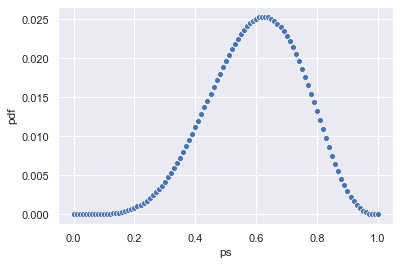

In [100]:
posterior = pd.DataFrame(np.c_[ps, pdf], columns =['ps', 'pdf'])
sns.scatterplot(data=posterior, x ='ps', y ='pdf')